In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings 
warnings.filterwarnings("ignore")

In [4]:
heart= pd.read_csv(r"C:\Users\rajak\Downloads\heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
heart.isnull().sum()
heart.shape
heart.columns



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
heart.info()
heart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


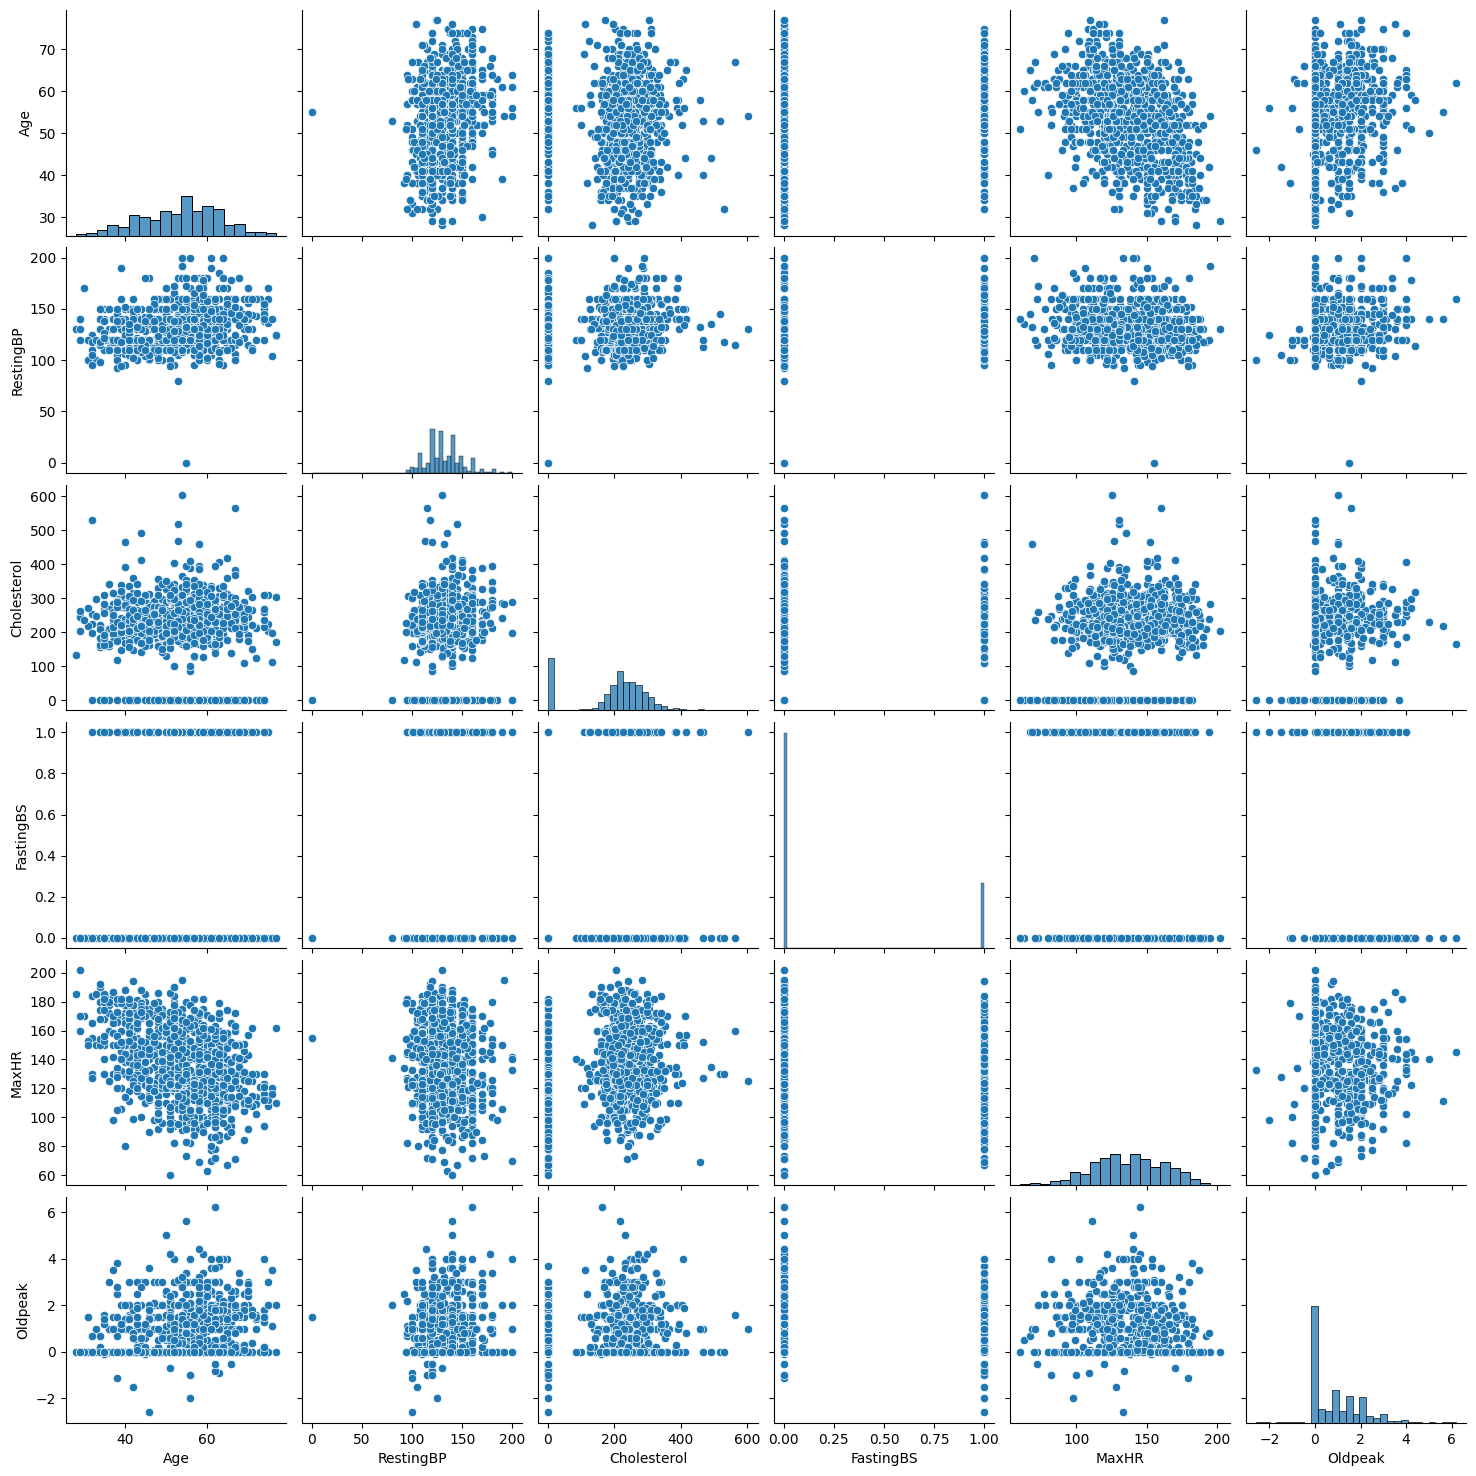

In [7]:

import matplotlib.pyplot as plt

x_vars = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
          'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina',
          'Oldpeak', 'ST_Slope']
sns.pairplot(heart[x_vars])
plt.show()


In [8]:
corr = heart.corr(numeric_only=True)
target_corr = corr['HeartDisease'].sort_values(ascending=False)
print(target_corr)


HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


In [9]:
print(heart.columns.tolist())

heart= pd.read_csv(r"C:\Users\rajak\Downloads\heart.csv")
heart.head()

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


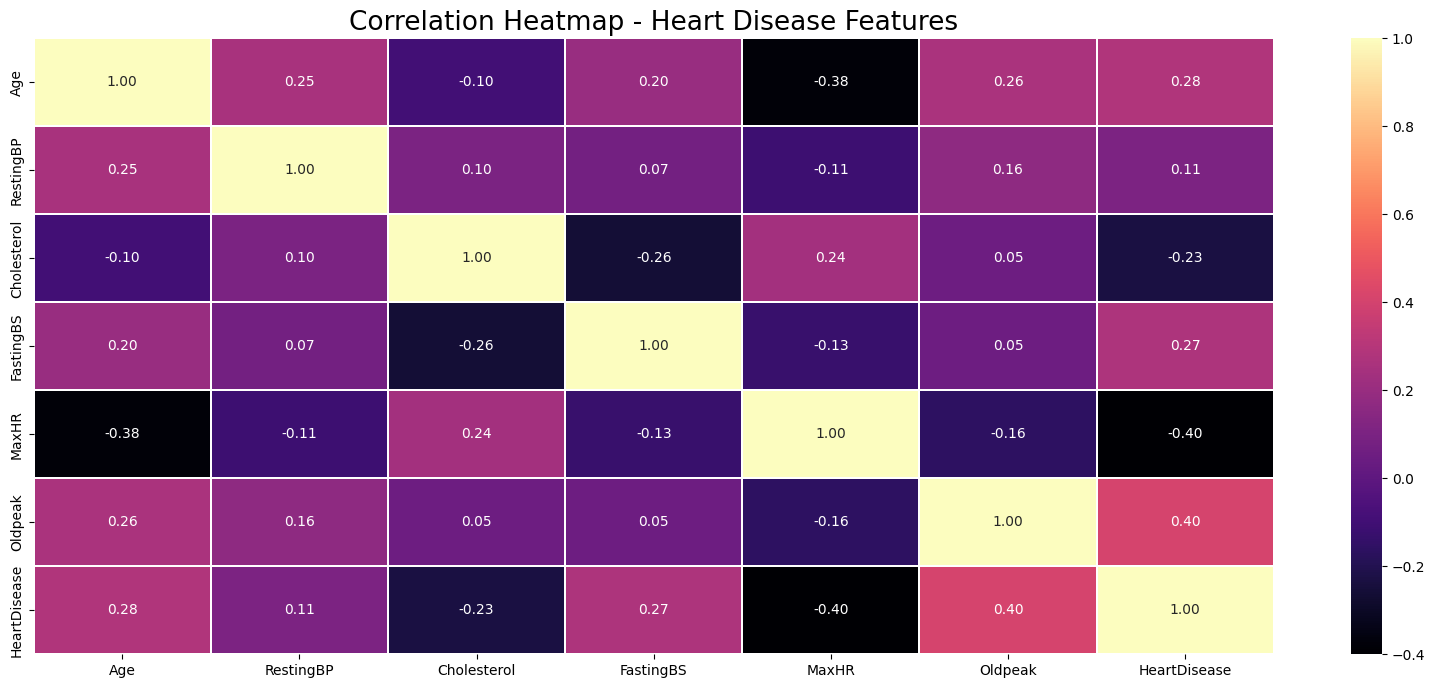

In [ ]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap - Heart Disease Features", fontsize=19)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

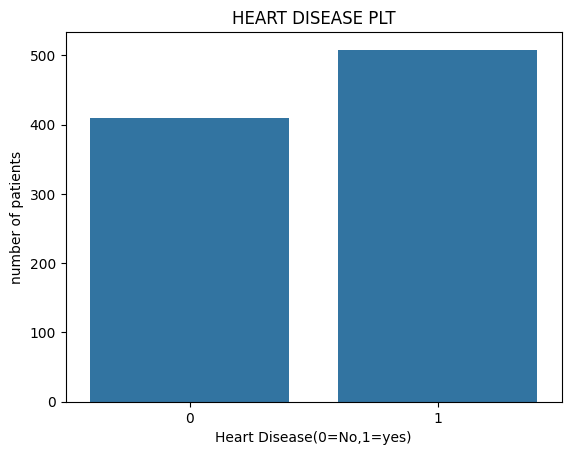

In [10]:
x='HeartDisease'
sns.countplot(x='HeartDisease',data=heart)
plt.title("HEART DISEASE PLT")
plt.xlabel("Heart Disease(0=No,1=yes)")
plt.ylabel('number of patients')
plt.show

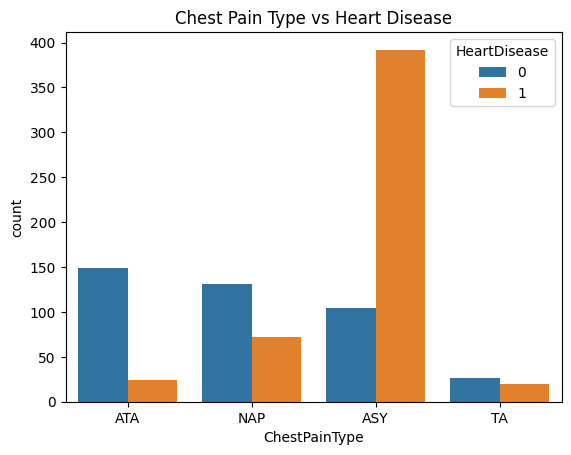

In [11]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=heart)
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


In [12]:
X = heart.drop("HeartDisease",axis=1)
Y =heart["HeartDisease"]
X.head()
Y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
print(X_train,X_test)

print(Y_train,Y_test)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
795   42   M           NAP        120          240          1     Normal   
25    36   M           NAP        130          209          0     Normal   
84    56   M           ASY        150          213          1     Normal   
10    37   F           NAP        130          211          0     Normal   
344   51   M           ASY        120            0          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
106   48   F           ASY        120          254          0         ST   
270   45   M           ASY        120          225          0     Normal   
860   60   M           ASY        130          253          0     Normal   
435   60   M           ASY        152            0          0         ST   
102   40   F           ASY        150          392          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  
795    194              N      0.8     Do

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
heart_encoded = pd.get_dummies(heart, drop_first=True)
X = heart_encoded.drop('HeartDisease', axis=1)
Y = heart_encoded['HeartDisease']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = SVC(kernel='linear')  
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(Y_test, Y_pred))
print("\n📊 Classification Report:\n", classification_report(Y_test, Y_pred))


✅ Accuracy: 0.8532608695652174

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [18]:

from sklearn.ensemble import RandomForestClassifier


heart_encoded = pd.get_dummies(heart, drop_first=True)
X = heart_encoded.drop('HeartDisease', axis=1)
Y = heart_encoded['HeartDisease']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(Y_test, Y_pred))
print("\n📊 Classification Report:\n", classification_report(Y_test, Y_pred))


✅ Accuracy: 0.8695652173913043

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [19]:
from sklearn.linear_model import LogisticRegression


heart_encoded = pd.get_dummies(heart, drop_first=True)
X = heart_encoded.drop('HeartDisease', axis=1)
Y = heart_encoded['HeartDisease']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(Y_test, Y_pred))
print("\n📊 Classification Report:\n", classification_report(Y_test, Y_pred))


✅ Accuracy: 0.8532608695652174

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [22]:
from sklearn.preprocessing import LabelEncoder

heart['Sex'] = LabelEncoder().fit_transform(heart['Sex'])
print(heart['Sex'])

0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int64


In [29]:
import pickle

X = pd.get_dummies(heart.drop('HeartDisease', axis=1))
y = heart['HeartDisease']

with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
